In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_17493/2451341646.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [16]:
# for gauss:
n_points = list(range(1, 21))
eps_list = [0.0, 0.2, 0.5, 0.7, 0.9, 1.0, 2.0]
num_repetition = 99

adv_test_loss = np.zeros([len(eps_list), len(n_points)+1, num_repetition], dtype=np.float64)

for i in range(0,7):
    if i == 3:
        continue
    arr = np.genfromtxt('tmp_{}.csv'.format(i),delimiter=',', skip_header = 0)
    arr_pruned = arr[:,2:]
    adv_test_loss[i] = arr_pruned
    adv_test_loss[:,0] = np.full(adv_test_loss[:,0].shape, -0.2)
adv_test_loss_tmp = np.genfromtxt('tmp_3.csv'.format(i),delimiter=',', skip_header = 0)[:,2:]
adv_test_loss_tmp.shape
adv_test_loss_tmp[0] = np.full(adv_test_loss_tmp[0].shape, -0.2)

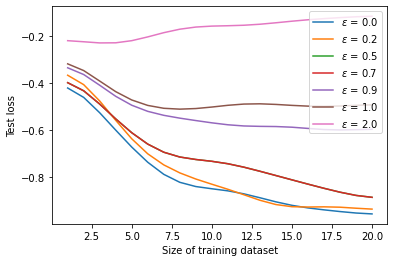

In [17]:
x=n_points

for eps_idx in range(len(eps_list)):
  if eps_idx == 3:
    x_n = list(range(1,21,2))  
    test_eps_n = np.zeros(len(x_n))    
    for n in x_n:
        n = int(n)
        test_eps_n[(n-1)//2] = np.mean(adv_test_loss_tmp[(n-1)//2,:])
    ysmoothed = gaussian_filter1d(test_eps, sigma=2)
    plt.plot(x, ysmoothed,label="$\epsilon$ = 0.7")
    continue
  eps = eps_list[eps_idx]
  test_eps=np.zeros(len(x))
  
  for n in n_points:
    n=int(n)
    test_eps[n-1]=np.mean(adv_test_loss[eps_idx,n-1,1:])
    
  #plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))
  ysmoothed = gaussian_filter1d(test_eps, sigma=2)
  plt.plot(x, ysmoothed,label="$\epsilon$ = {}".format(eps))
  

plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.savefig('Class_loss_gauss_filter2.pdf')
#files.download('Class_loss_gauss_filter2.pdf')
plt.show()

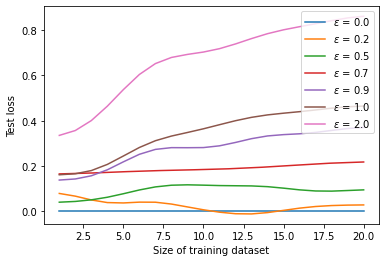

In [8]:
x=n_points
baseline = np.mean(adv_test_loss[0,:,1:], axis=1)

for eps_idx in range(len(eps_list)):
  if eps_idx == 3:
    x_n = np.linspace(1,20,10)  
    test_eps_n = np.zeros(10)    
    for n in range(10):
        n = int(n)
        test_eps_n[n] = np.mean(adv_test_loss_tmp[n,:]) - np.mean(adv_test_loss[0,n*2,1:])
    ysmoothed = gaussian_filter1d(test_eps_n, sigma=2)
    plt.plot(x_n, ysmoothed,label="$\epsilon$ = 0.7")
    continue
  eps = eps_list[eps_idx]
  test_eps=np.zeros(len(x))
  
  for n in n_points:
    n=int(n)
    test_eps[n-1]=np.mean(adv_test_loss[eps_idx,n-1,1:]) - np.mean(adv_test_loss[0,n-1,1:])
    
  #plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))
  ysmoothed = gaussian_filter1d(test_eps, sigma=2)
  plt.plot(x, ysmoothed,label="$\epsilon$ = {}".format(eps))
  

plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.savefig('Class_loss_gauss_filter2.pdf')
#files.download('Class_loss_gauss_filter2.pdf')
plt.show()

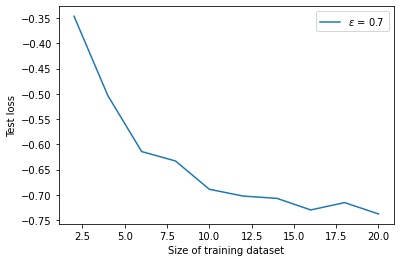

In [9]:
x=np.linspace(2,20, num=10)
test_eps = np.zeros(10)
eps = 0.7
for n in range(10):
    n=int(n)
    test_eps[n]=np.mean(adv_test_loss_tmp[n,2:])
    
plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))   
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.show()

In [50]:
baseline = np.genfromtxt('tmp_0_gauss_0.csv',delimiter=',', skip_header = 1)
baseline = baseline[:,1:]
baseline = np.mean(baseline, axis=1)

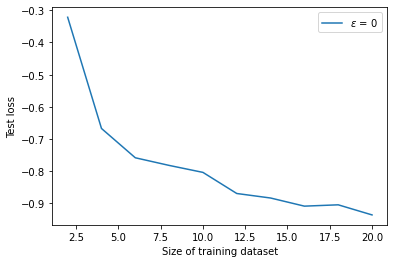

In [51]:
x = np.linspace(2,20,10)

plt.plot(x, baseline,label="$\epsilon$ = 0")   
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.show()

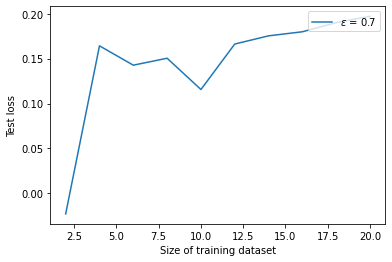

In [53]:
x=np.linspace(2,20, num=10)

test_eps = np.zeros(10)
eps = 0.7
for n in range(10):
    n=int(n)
    test_eps[n]=np.mean(adv_test_loss_tmp[n,1:])
  
test_eps = test_eps - baseline
plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))   
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.show()